# Explotary Data Analysis

### importing all the neede Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 


#### constants

In [2]:
cleaned_data_path = '../data/cleaned_data.csv'

## Loading the Data Set

In [3]:
df = pd.read_csv('../data/Medical_insurance.csv')
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()


,age,bmi,no_of_children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.describe(include='all')

,age,gender,bmi,no_of_children,smoker,region,charges
count,2772.000000,2772,2772.000000,2772.000000,2772,2772,2772.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1406,NaN,NaN,2208,766,NaN
mean,39.109668,NaN,30.701349,1.101732,NaN,NaN,13261.369959
std,14.081459,NaN,6.129449,1.214806,NaN,NaN,12151.768945
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4687.797000
50%,39.000000,NaN,30.447500,1.000000,NaN,NaN,9333.014350
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16577.779500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   object 
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   object 
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


## Data Understanding

### Data Fields Explained

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

![image.png](../images/DataSet_Params.png)

![image.png](../images/DataSet_visulatisations.png)

# Data Wrangling


#### Clean the data , taking care of the blank entries

In [7]:
df.isnull().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

#### Handling Messing Data

 replace missing/? with NaN

In [8]:
df.replace("?",np.nan, inplace = True)
df.replace("",np.nan, inplace = True)
df.replace(" ",np.nan, inplace = True)
df.replace("nan",np.nan, inplace = True)
df.replace("NAN",np.nan, inplace = True)
df.replace("na",np.nan, inplace = True)
df.replace("NA",np.nan, inplace = True)
df.replace("Na",np.nan, inplace = True)
df.replace("n/a",np.nan, inplace = True)
df.replace("N/A",np.nan, inplace = True)
df.replace("N.a",np.nan, inplace = True)
print(df.isna().sum())


print("__________________________")
# Replace blank spaces ("") or only-space strings with NaN
test = df.replace(r'^\s*$', np.nan, regex=True)
# comparing with the original data
comparison = df.equals(test)
print("DataFrames are equal: ", comparison)

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64
__________________________
DataFrames are equal:  True


##### For continuous attributes (e.g., age), replace missing values with the mean.

In [9]:
mean_age = math.floor(df['age'].mean())  
mean_bmi = df['bmi'].mean()
mean_children = math.floor(df['no_of_children'].mean())
mean_charges = df['no_of_children'].mean()
print('Mean Age: ', mean_age)
print('Mean BMI: ', mean_bmi)
print('Mean Children: ', mean_children)
print('Mean Charges: ', mean_charges)


Mean Age:  39
Mean BMI:  30.70134920634921
Mean Children:  1
Mean Charges:  1.1017316017316017


##### For categorical attributes (e.g., smoker), replace missing values with the most frequent value.


In [10]:
most_freq_region = df['region'].mode()[0]
most_freq_smoker = df['smoker'].mode()[0]
most_freq_gender = df['gender'].mode()[0]
print('Most Frequent Region: ', most_freq_region)
print('Most Frequent Smoker: ', most_freq_smoker)
print('Most Frequent gender: ', most_freq_gender)

Most Frequent Region:  southeast
Most Frequent Smoker:  no
Most Frequent gender:  male


In [11]:
prev_shape = df.shape
df.fillna({
      'age': mean_age,
      'bmi': mean_bmi,
      'no_of_children': mean_children,
      'charges': mean_charges,
      'region': most_freq_region,
      'smoker': most_freq_smoker,
      'gender': most_freq_gender
  }, inplace=True)
print("After cleaning the data")
print(df.info())
print("__________________________")
print("sum of nan values : ",df.isna().sum())
print("testing shapes : ",df.shape == prev_shape)
# conclusion : no nan values in the data


After cleaning the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   object 
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   object 
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None
__________________________
sum of nan values :  age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64
testing shapes :  True


 Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.

In [12]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())


   age  gender     bmi  no_of_children smoker     region   charges
0   19  female  27.900               0    yes  southwest  16884.92
1   18    male  33.770               1     no  southeast   1725.55
2   28    male  33.000               3     no  southeast   4449.46
3   33    male  22.705               0     no  northwest  21984.47
4   32    male  28.880               0     no  northwest   3866.86


## Explotary Data Analysis

### Histogram plot of the cahrges
Are most insurance charges low or high? Are there extreme values?


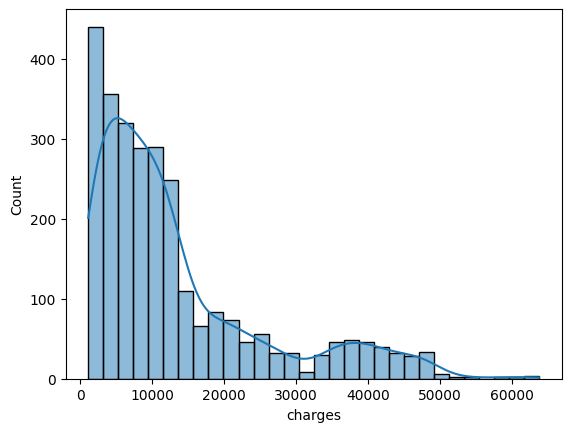

maximun recorded charge : 63770.43


In [13]:
sns.histplot(df["charges"], bins=30, kde=True)
plt.show()
print("maximun recorded charge :",max(df["charges"]))


we can see that most of the charges ranges between 0 and 15000

### Implement the box plot for `charges` with respect to `smoker`.

c:\Users\imadb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='smoker', ylabel='charges'>

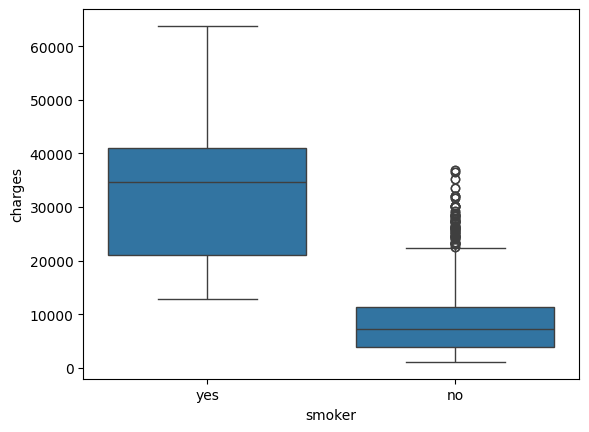

In [14]:
#Implement the box plot for `charges` with respect to `smoker`.
sns.boxplot(x="smoker", y="charges", data=df)


This box plot compares insurance charges between smokers and non-smokers. Key insights:

1. **Smokers pay significantly higher charges**: The median insurance cost for smokers is much higher than for non-smokers.
2. **Wider spread among smokers**: The range (interquartile range and whiskers) for smokers is much larger, indicating high variability in insurance costs.
3. **More outliers in non-smokers**: While non-smokers generally have lower charges, there are several outliers with higher costs.
4. **Clear distinction**: Smoking status is a strong factor influencing insurance charges, likely due to increased health risks associated with smoking.

This suggests that smoking has a major financial impact on insurance costs.

### Correlation Matrix of the data set

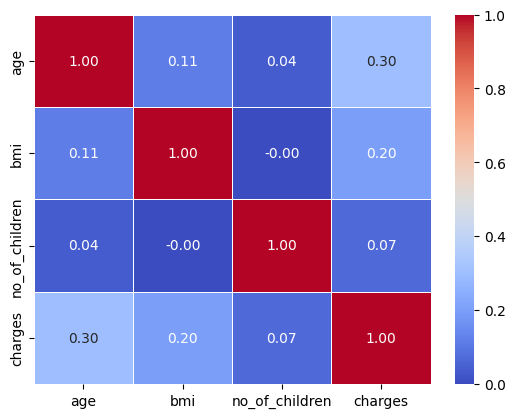

In [15]:
only_numbers = df.select_dtypes(include=[np.number])
sns.heatmap(only_numbers.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

This heatmap represents the correlation matrix of variables related to insurance charges. Key insights:

1. **Age vs. Charges (0.30)**: Moderate positive correlation, indicating that older individuals tend to have higher insurance charges.
2. **BMI vs. Charges (0.20)**: Weak positive correlation, suggesting that higher BMI may slightly contribute to higher insurance costs.
3. **No. of Children vs. Charges (0.07)**: Very weak correlation, implying that the number of children has little impact on insurance charges.
4. **Age vs. BMI (0.11)** and **Age vs. No. of Children (0.04)**: Almost no correlation, showing that these factors are independent.

Overall, age has the strongest impact on charges, while the number of children is almost irrelevant.

### implimenting scatter plot


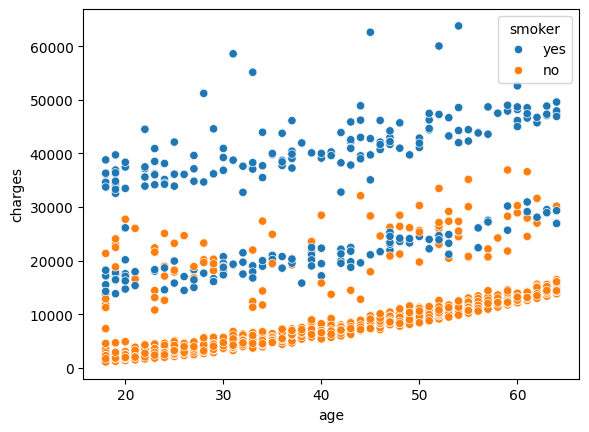

In [16]:
#implimenting scatter plot
sns.scatterplot(x="age", y="charges", data=df, hue="smoker")
plt.show()


This scatter plot visualizes the relationship between **age** and **insurance charges**, with points colored by **smoker status**. Here’s what it tells us:

1. **Smokers (blue) have significantly higher charges than non-smokers (orange)**  
   - At any age, smokers generally have higher insurance costs than non-smokers.  
   - The gap between smokers and non-smokers widens with age.

2. **Insurance charges increase with age**  
   - Both groups show an upward trend, meaning older individuals tend to have higher insurance charges.  
   - For non-smokers, the increase is gradual, whereas for smokers, it is much steeper.

3. **Distinct clusters for smokers and non-smokers**  
   - Non-smokers have a more compact and predictable range of charges.  
   - Smokers show a more scattered pattern, with some paying extremely high amounts.

#### **Main Takeaway:**  
**Smoking dramatically increases insurance charges, and the effect grows stronger with age.**

---
### Implement the regression plot for `charges` with respect to `bmi`. 

(0.0, 66902.85800000001)

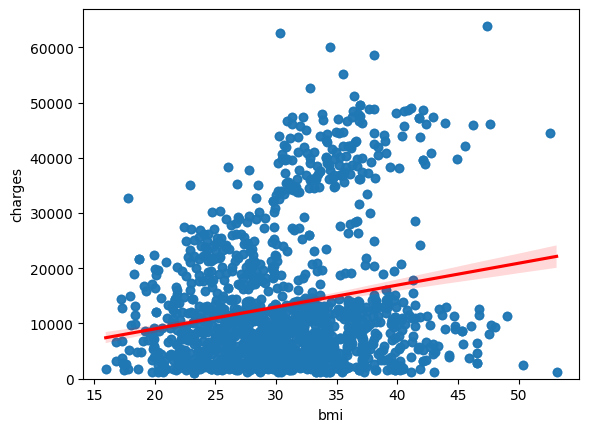

In [17]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

- The **x-axis (BMI)** shows how fat a person is.  
- The **y-axis (charges)** shows how much they spend on medical costs.  
- The **blue dots** are actual data points (real people).  
- The **red line** is the trend (regression line), showing the general direction.  
- Since the **red line goes up**, it means **higher BMI tends to lead to higher medical costs**.  
- But the dots are **scattered**, meaning BMI isn’t the **only** factor—other things (like age, smoking, health conditions) also affect costs.  

### **Final Insight:**  
**People with higher BMI generally have higher medical expenses, but BMI alone doesn’t perfectly predict costs.**

## Exporinting the cleaned data 

In [18]:
df.to_csv(cleaned_data_path, index=False)